## Jupyter notebook for cancer neural network
This neural network is based off the google colab video on building a deep neural network to identify cancer cells
The output of the network predicts if a cell is malignant or benign.

### Dataset 
The data set used to train and test this model is a modification of the wdbc data from
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
I selected this data as its an easy classification model to show how neural networks function

#### The code
the first step is to import pandas for our data handling and read in our data set


In [1]:
import pandas as pd
#data set
ds = pd.read_csv("cancer.csv")
# x data set is the dataset without the results so drop the first column
x = ds.drop(columns="diagnosis(1=m, 0=b)")
# y is just the known results
y=ds["diagnosis(1=m, 0=b)"]

Now we have the data split into just the variables and the results. However like the tensor flow video this must be broke down into a training and testing set.

I ended up using the sklearn AI tool as this had a way to split the data in the same way as the video while the keras api only appeared to have a way to split the data into to parts.

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15) 

The data set is now split so 15% of the data is in the testing set and the rest of the data is in the training set.

With our data set ready we can now start to set up the network. For this I am using the keras API for python.

To initialize the network the input dimension will be set to thirty since x contains 30 features defining each cell.

for the layers I am starting with 32 and dropping by half each time until there is one output predicting if the cell is malignant of benign. The reason for starting with 32 is so its not exactly the same as the tutorial. 

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the neural network
classifier = Sequential()
# Layers 
classifier.add(Dense(units = 32, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

With the network defined we now have to define the optimizer and loss functions. Unlike our textbook where we had to program the functions ourself it is instead handled by keras.

I am using adam since it is the most widely used optimizer and binary cross entropy since there are only two possible outputs.

In [4]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

Now the network must be trained this is again made easy by keras where we just need to use the fit function and pass in the training data, the correct output for the training data, the size of the batches to test in, and how many times to run through the training.

As a quick reminder batch size is the number of training examples in one forward/backward pass
Epochs is the number of times to run training samples. so in this case we are running one example at a time 150 times.

In [5]:
# needed to graph data
from keras.callbacks import History
history = classifier.fit(x_train, y_train, batch_size = 1, epochs = 150)


Epoch 1/150
483/483 [==============================] - 1s 634us/step - loss: 3.5782
Epoch 2/150
483/483 [==============================] - 0s 631us/step - loss: 0.5115
Epoch 3/150
483/483 [==============================] - 0s 620us/step - loss: 0.3838
Epoch 4/150
483/483 [==============================] - 0s 608us/step - loss: 0.4246
Epoch 5/150
483/483 [==============================] - 0s 622us/step - loss: 0.3690
Epoch 6/150
483/483 [==============================] - 0s 628us/step - loss: 0.2731
Epoch 7/150
483/483 [==============================] - 0s 639us/step - loss: 0.3162
Epoch 8/150
483/483 [==============================] - 0s 625us/step - loss: 0.2874
Epoch 9/150
483/483 [==============================] - 0s 617us/step - loss: 0.2922
Epoch 10/150
483/483 [==============================] - 0s 622us/step - loss: 0.3972
Epoch 11/150
483/483 [==============================] - 0s 617us/step - loss: 0.5765
Epoch 12/150
483/483 [==============================] - 0s 635us/step - lo

graph of loss as epochs increase

dict_keys(['loss'])


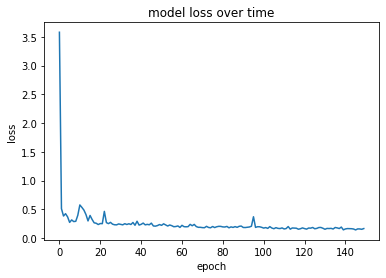

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss over time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

With the network now trained it is time to test the network on data it has never seen before.
The prediction is also being clipped so if the confidence is over 50% it outputs a one and otherwise the output is a zero.

In [7]:
y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

3/3 [==============================] - 0s 1ms/step


The final part of this code is taking these y predictions and comparing them with out y test data. If the prediction is correct than the correct counter is incremented and if it is incorrect than the incorrect counter is incremented. It will also display the testing accuracy.

Accuracy 0.9186046511627907
Correct 79
incorrect 7


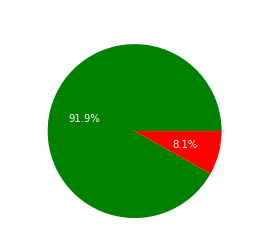

In [8]:
total = 0
correct = 0
incorrect = 0
count = 0

# loop all predictions
for cell in y_test:
  # check each position in array and if the known solution matches the prediction
  if(cell == y_pred[total]):
    correct=correct+1
  else:
    incorrect=incorrect+1
  total=total+1

print("Accuracy " + str(correct/total))
print("Correct " + str(correct))
print("incorrect " + str(incorrect))

fResults = [correct, incorrect]
myLabels = ["correct", "incorrect"]
myColors = ["green","red"]
# plot data, labels, colors, display percentiles
plt.pie(fResults, labels=myLabels, colors=myColors, autopct='%1.1f%%', textprops={'color':"w"})
plt.title("Neural network accuracy breakdown",{'color':"w"})
plt.show()

## output
The final output for this network should look similar to 
Accuracy 0.9651162790697675
Correct 83
incorrect 3

this shows that out of the 86 pieces of test data 83 where correctly predicted giving an accuracy of 96.5%